# **TSLA Stock Exploratory Data Analysis**

In [1]:
!pip install mplfinance

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import scipy.stats as stats
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,4,28)

TSLA = yf.download('TSLA', start_date , end_date)
TSLA.reset_index(inplace = True)
TSLA['Company'] = 'TSLA'

[*********************100%***********************]  1 of 1 completed


In [4]:
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,TSLA
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,TSLA
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,TSLA
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,TSLA
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,TSLA
...,...,...,...,...,...,...,...,...
831,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,TSLA
832,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,TSLA
833,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,TSLA
834,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,TSLA


In [5]:
NIO = yf.download('NIO',start_date ,end_date)
NIO.reset_index(inplace=True)
NIO['Company'] = 'NIO'

LI = yf.download('LI',start_date ,end_date)
LI.reset_index(inplace=True)
LI['Company'] = 'LI'

RIVN = yf.download('RIVN',start_date ,end_date)
RIVN.reset_index(inplace=True)
RIVN['Company'] = 'RIVN'

GM = yf.download('GM',start_date ,end_date)
GM.reset_index(inplace=True)
GM['Company'] = 'GM'

TM = yf.download('TM',start_date ,end_date)
TM.reset_index(inplace=True)
TM['Company'] = 'TM'

F = yf.download('F',start_date ,end_date)
F.reset_index(inplace=True)
F['Company'] = 'F'

RACE = yf.download('RACE',start_date ,end_date)
RACE.reset_index(inplace=True)
RACE['Company'] = 'RACE'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Concatenate all the stock dataframes into one
all_stocks = pd.concat([TSLA, NIO, LI, RIVN, GM, TM, F, RACE], axis=0)
all_stocks.reset_index(drop=True, inplace=True)

In [7]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,TSLA
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,TSLA
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,TSLA
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,TSLA
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,TSLA
...,...,...,...,...,...,...,...,...
6069,2023-04-21,276.809998,278.774994,274.779999,278.029999,276.040985,324300,RACE
6070,2023-04-24,278.839996,280.644012,278.839996,280.190002,280.190002,316000,RACE
6071,2023-04-25,279.959991,280.179993,277.140015,277.209991,277.209991,249800,RACE
6072,2023-04-26,278.220001,279.239990,274.630005,275.410004,275.410004,325100,RACE


In [8]:
# Calculate additional features
all_stocks['MA_10'] = all_stocks['Adj Close'].rolling(10).mean()
all_stocks['MA_20'] = all_stocks['Adj Close'].rolling(20).mean()
all_stocks['MA_60'] = all_stocks['Adj Close'].rolling(60).mean()

all_stocks['Daily Return'] = all_stocks['Adj Close'].pct_change()

In [9]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Company,MA_10,MA_20,MA_60,Daily Return
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,TSLA,NaN,NaN,NaN,NaN
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,TSLA,NaN,NaN,NaN,0.029633
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,TSLA,NaN,NaN,NaN,0.019255
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,TSLA,NaN,NaN,NaN,0.038801
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,TSLA,NaN,NaN,NaN,0.049205
...,...,...,...,...,...,...,...,...,...,...,...,...
6069,2023-04-21,276.809998,278.774994,274.779999,278.029999,276.040985,324300,RACE,276.667480,271.912242,264.313659,0.007355
6070,2023-04-24,278.839996,280.644012,278.839996,280.190002,280.190002,316000,RACE,277.582776,272.748164,264.883535,0.015030
6071,2023-04-25,279.959991,280.179993,277.140015,277.209991,277.209991,249800,RACE,278.077951,273.395372,265.305286,-0.010636
6072,2023-04-26,278.220001,279.239990,274.630005,275.410004,275.410004,325100,RACE,278.153851,273.945630,265.737910,-0.006493


In [10]:
all_stocks = all_stocks[all_stocks['MA_10'].notna()]
all_stocks = all_stocks[all_stocks['MA_20'].notna()]
all_stocks = all_stocks[all_stocks['MA_60'].notna()]
all_stocks = all_stocks[all_stocks['Daily Return'].notna()]

In [11]:
stock_list = ['TSLA', 'NIO', 'LI', 'RIVN', 'GM', 'TM', 'F', 'RACE']
stock_list

['TSLA', 'NIO', 'LI', 'RIVN', 'GM', 'TM', 'F', 'RACE']

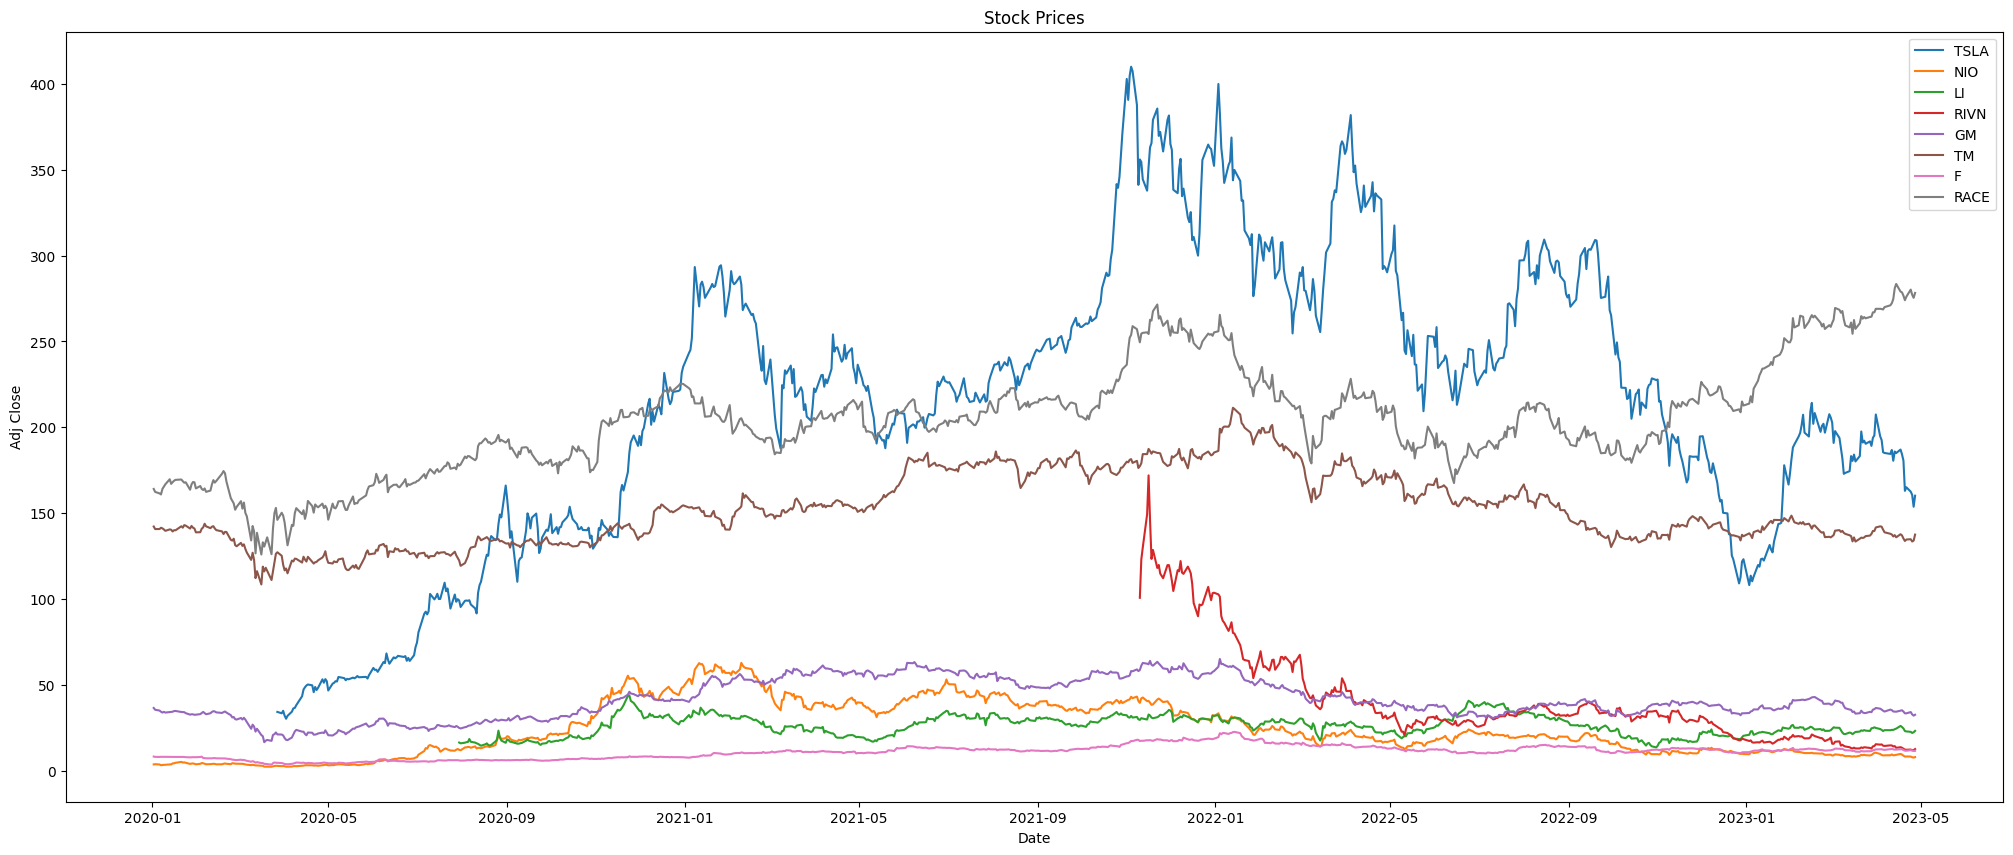

In [12]:
# Stock Prices Plot using seaborn
plt.figure(figsize=(25, 10))
sns.lineplot(data=all_stocks, x='Date', y='Adj Close', hue='Company')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Stock Prices')
plt.legend()
plt.show()

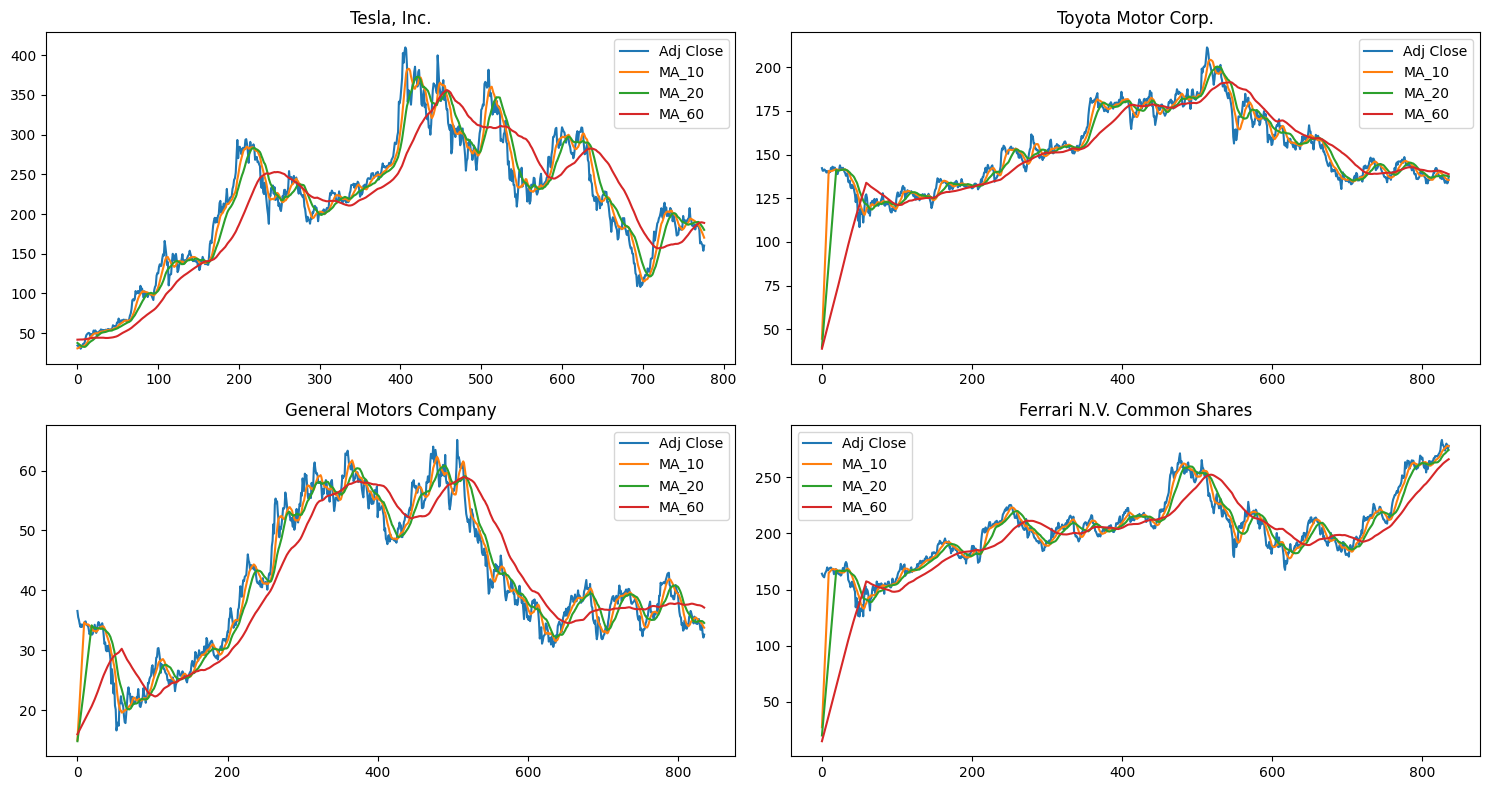

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA_Final = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_Final.reset_index(drop=True, inplace=True)
TSLA_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[0,0])
axes[0,0].set_title('Tesla, Inc.')

TM_Final = all_stocks[all_stocks['Company'] == 'TM']
TM_Final.reset_index(drop=True, inplace=True)
TM_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[0,1])
axes[0,1].set_title('Toyota Motor Corp.')

GM_Final = all_stocks[all_stocks['Company'] == 'GM']
GM_Final.reset_index(drop=True, inplace=True)
GM_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[1,0])
axes[1,0].set_title('General Motors Company')

RACE_Final = all_stocks[all_stocks['Company'] == 'RACE']
RACE_Final.reset_index(drop=True, inplace=True)
RACE_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[1,1])
axes[1,1].set_title('Ferrari N.V. Common Shares')

fig.tight_layout()

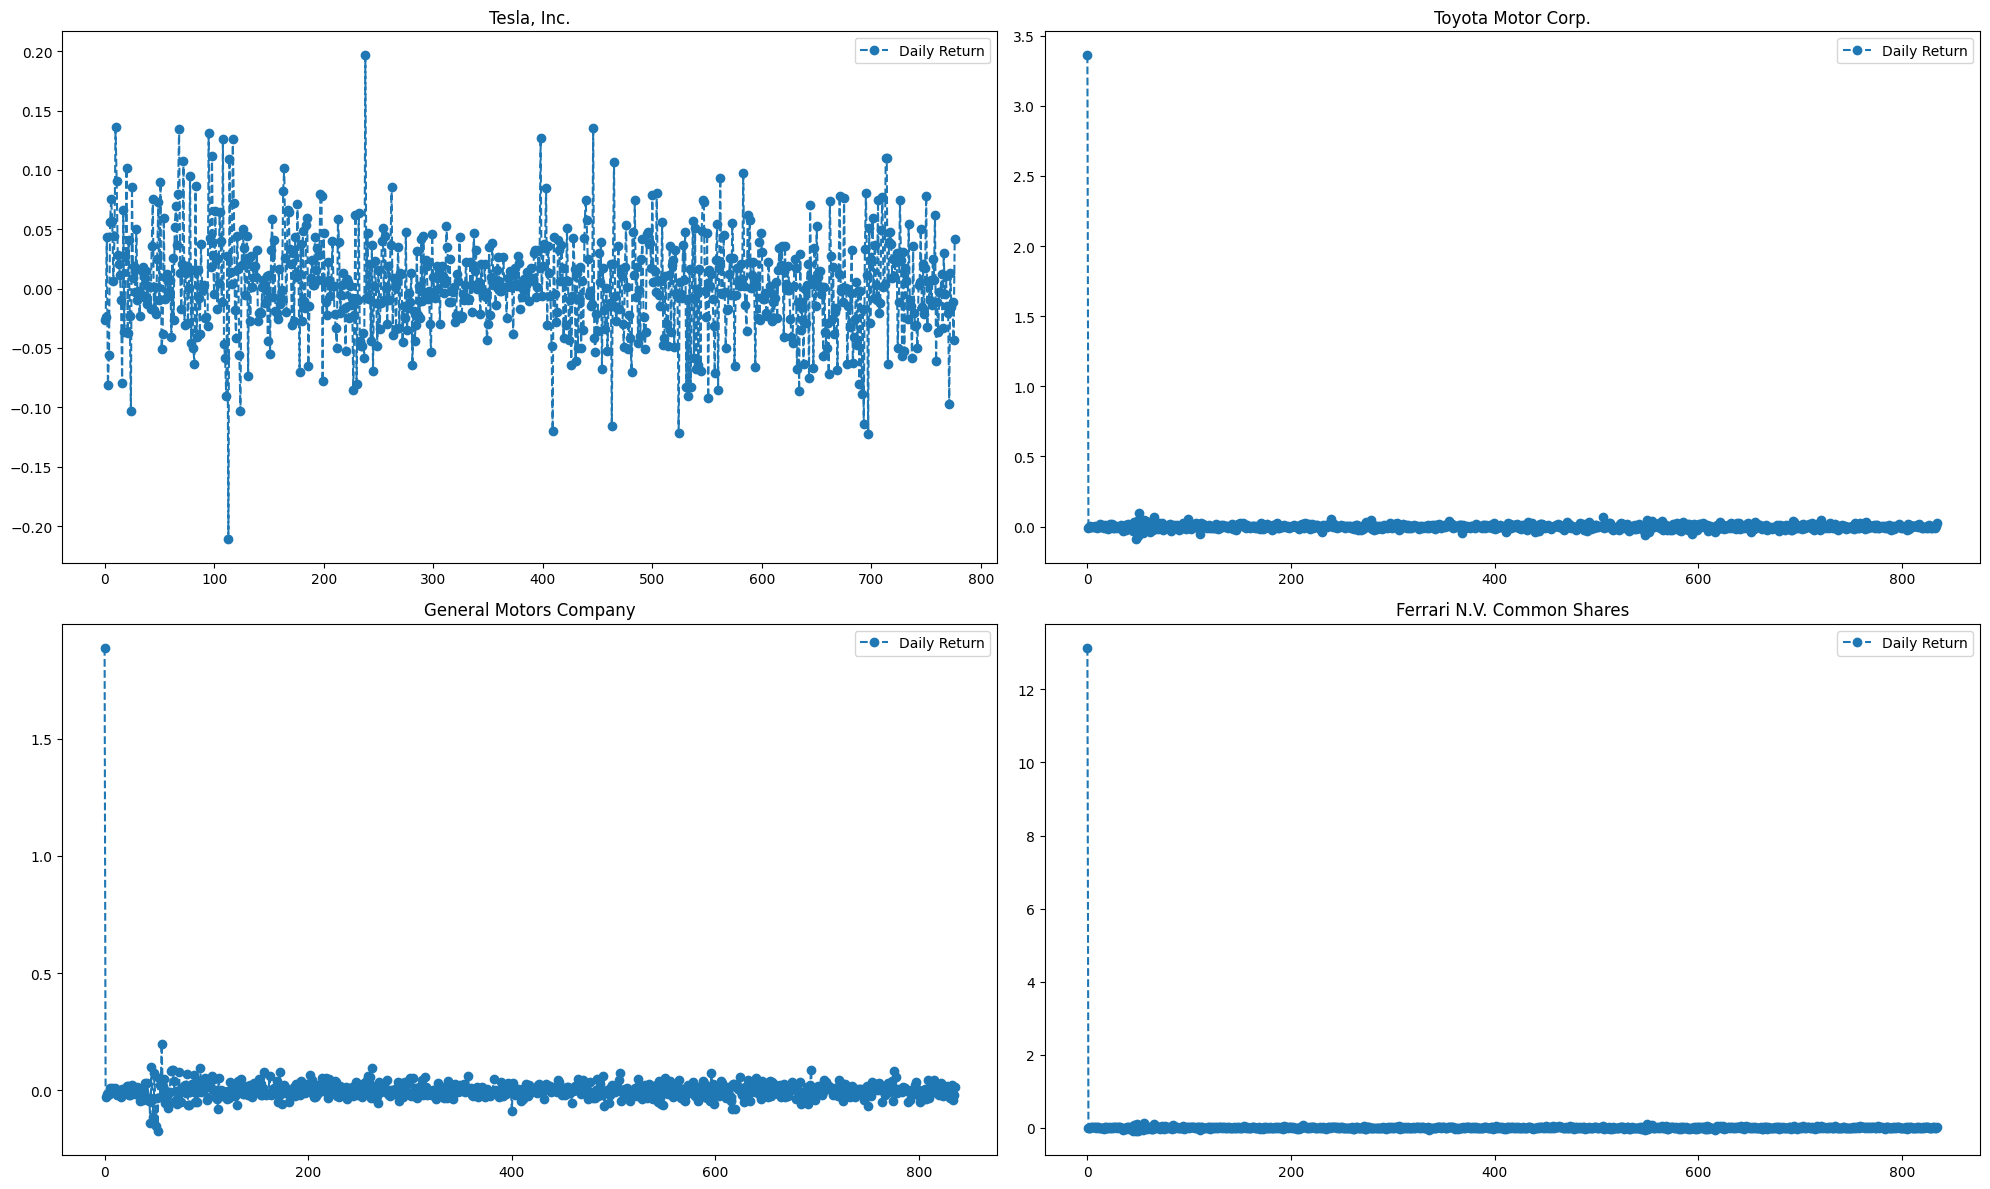

In [14]:
# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(20)

TSLA_Final = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_Final.reset_index(drop=True, inplace=True)
TSLA_Final['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Tesla, Inc.')

TM_Final = all_stocks[all_stocks['Company'] == 'TM']
TM_Final.reset_index(drop=True, inplace=True)
TM_Final['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Toyota Motor Corp.')

GM_Final = all_stocks[all_stocks['Company'] == 'GM']
GM_Final.reset_index(drop=True, inplace=True)
GM_Final['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('General Motors Company')

RACE_Final = all_stocks[all_stocks['Company'] == 'RACE']
RACE_Final.reset_index(drop=True, inplace=True)
RACE_Final['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Ferrari N.V. Common Shares')

fig.tight_layout()

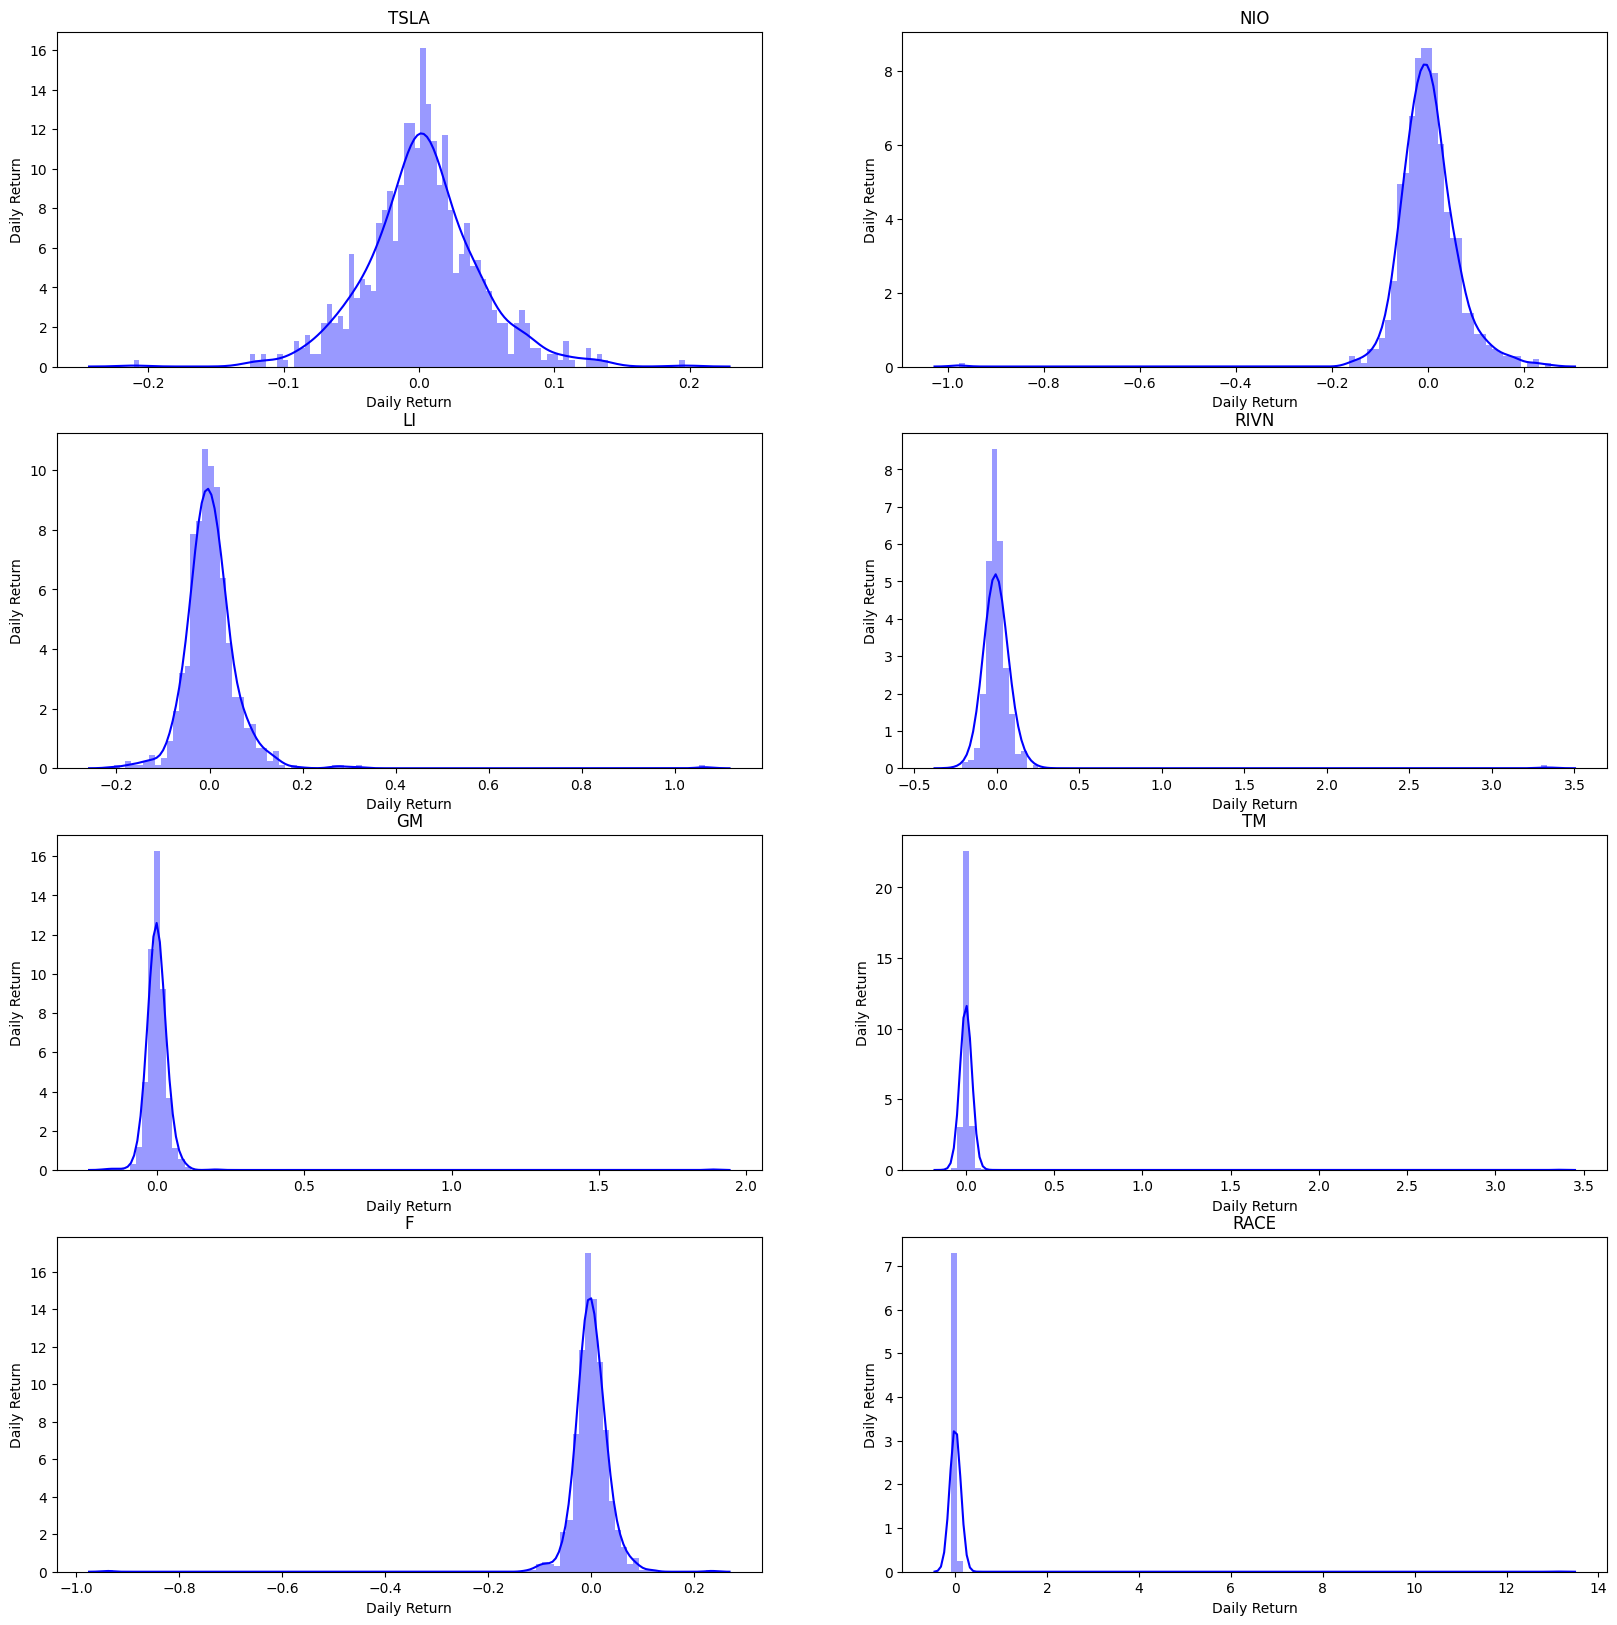

In [15]:
# To get a better view of above chart
plt.figure(figsize=(20, 20))

for i, company in enumerate(stock_list, 1):
    company_data = all_stocks[all_stocks['Company'] == company]

    plt.subplot(4, 2, i)
    sns.distplot(company_data['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(company)

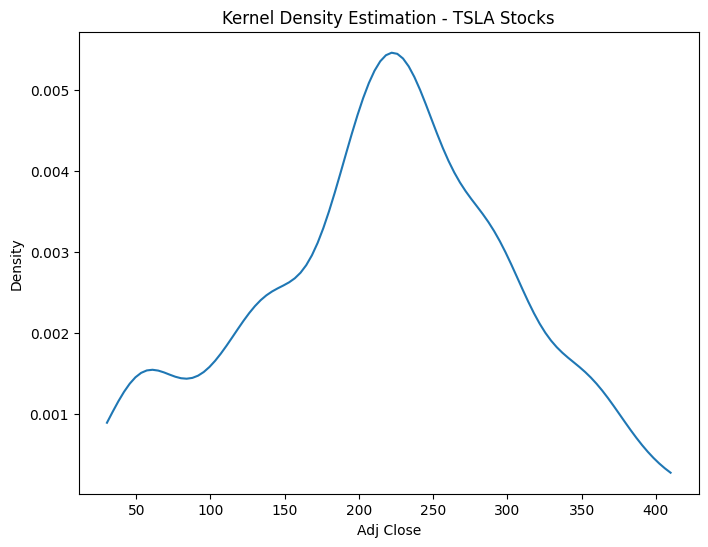

In [16]:
TSLA_Data = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_ADJ_Close = TSLA_Data['Adj Close']

# Fit the KDE to the TSLA data
kde = stats.gaussian_kde(TSLA_ADJ_Close)
x = np.linspace(TSLA_ADJ_Close.min(), TSLA_ADJ_Close.max(), 100)
y = kde(x)

# Plot the KDE
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Adj Close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation - TSLA Stocks')
plt.show()

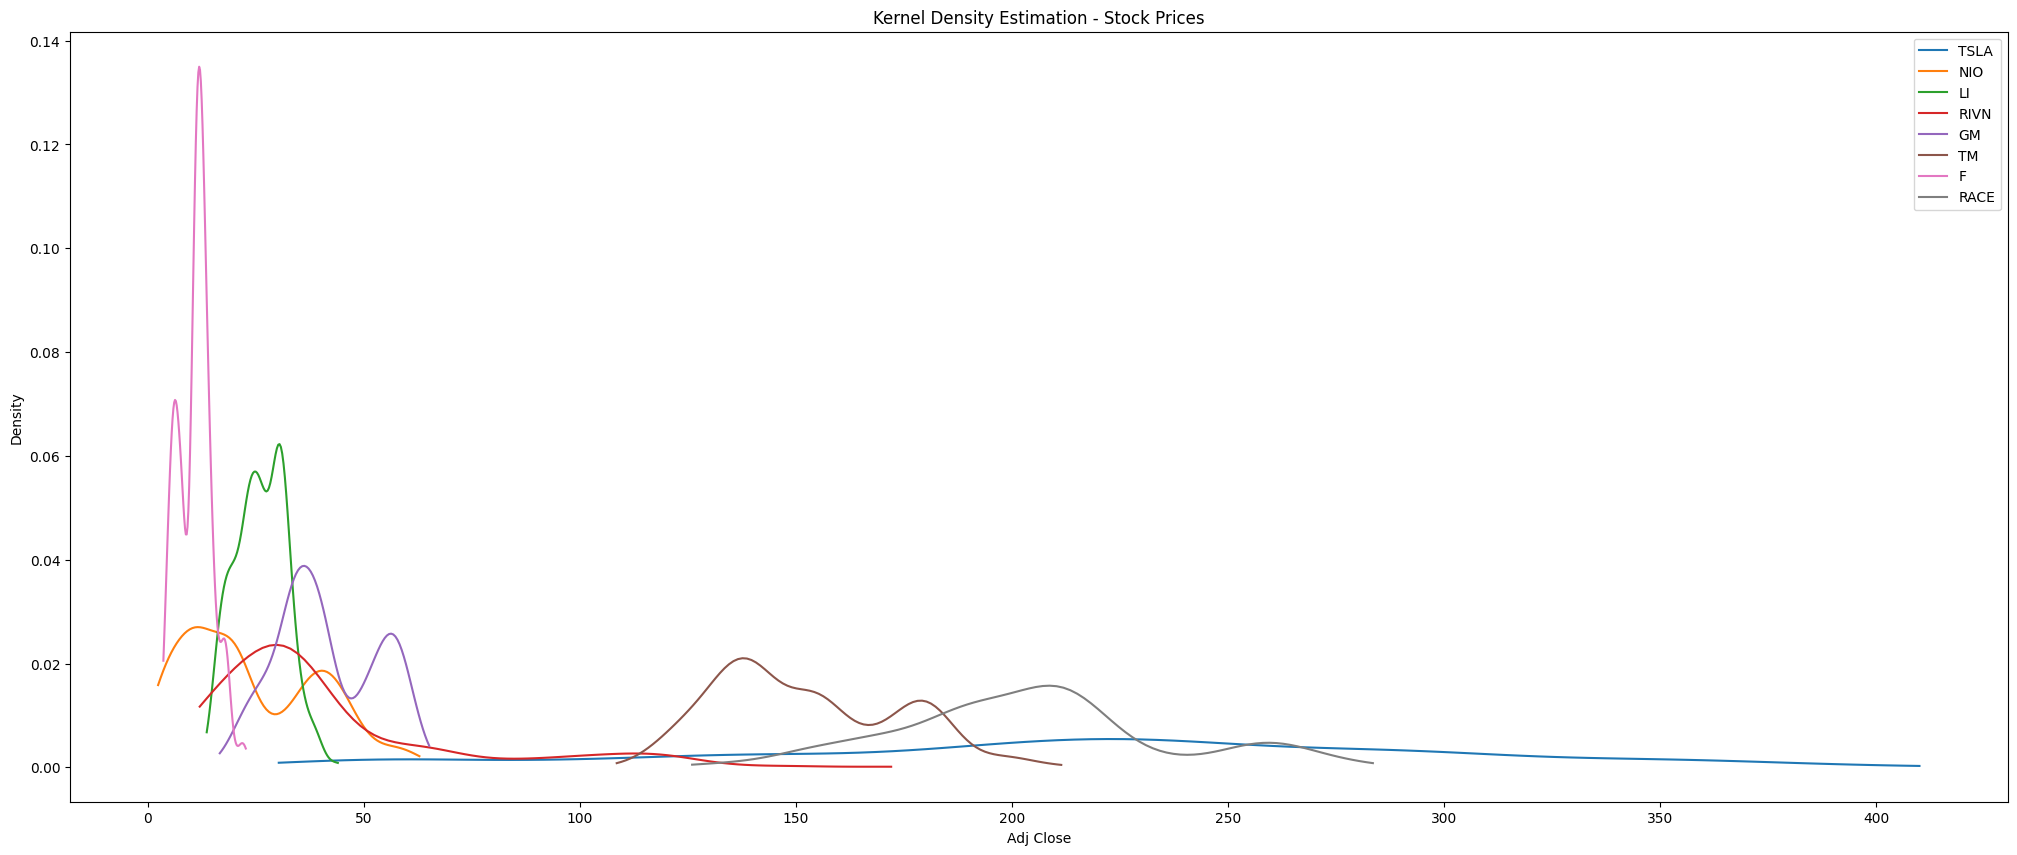

In [17]:
plt.figure(figsize=(25, 10))

for stock in stock_list:
    stock_data = all_stocks[all_stocks['Company'] == stock]
    adj_close = stock_data['Adj Close']
    kde = stats.gaussian_kde(adj_close)
    x = np.linspace(adj_close.min(), adj_close.max(), 100)
    y = kde(x)
    plt.plot(x, y, label=stock)

plt.xlabel('Adj Close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation - Stock Prices')
plt.legend()
plt.show()